# 1d dataset for demonstration

Uses the kung dataset:

Females in the Kung dataset

(100, 287)
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

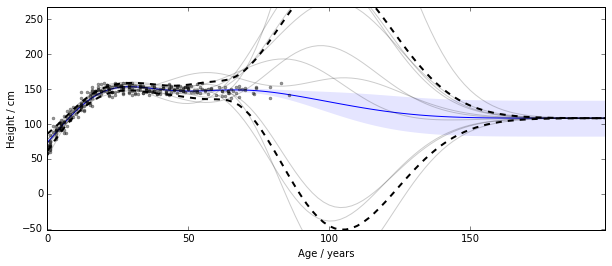

In [6]:
import dp4gp_datasets
import dp4gp
import random
import numpy as np
import GPy
import matplotlib.pyplot as plt
import dp4gp_histogram
import pandas as pd
%matplotlib inline

kung = dp4gp_datasets.load_kung()

X = kung[kung[:,3]==0,2:3]
y = kung[kung[:,3]==0,0:1]
sens = 100.0
epsilon = 1.0
delta = 0.01

middley = (np.max(y)+np.min(y))/2
y[y>middley+sens/2] = middley+sens/2
y[y<middley-sens/2] = middley-sens/2

#ysub = np.mean(y)
ysub = (max(y)+min(y))/2.0
y = y - ysub


ys_std = np.std(y)
y = y / ys_std
ac_sens = sens/ys_std


kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
model = GPy.models.GPRegression(X,y,kern,normalizer=None)
model.Gaussian_noise = 0.3

dpgp = dp4gp.DPGP_cloaking(model,ac_sens,epsilon,delta)
Xtest = np.arange(-40,140,3)[:,None]

plt.figure(figsize=[10,4])
#plt.subplot(1,2,1)
dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:200},Nits=1000,ys_mean=ysub,ys_std=ys_std)
plt.ylim([middley-sens*0.6,middley+sens*0.6])
plt.ylabel('Height / cm')
plt.xlabel('Age / years')
plt.savefig('kung_cloaking.pdf')

In [ ]:
model.Gaussian_noise.variance.values[0] * ys_std

# Using standard method

4.38163537972
1.10816750703
One free dimension - 1d plot
Plotting mean (100)


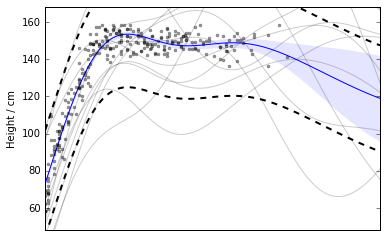

In [5]:
import dp4gp_datasets
import dp4gp
import random
import numpy as np
import GPy
import matplotlib.pyplot as plt
import dp4gp_histogram
import pandas as pd
%matplotlib inline

kung = dp4gp_datasets.load_kung()

X = kung[kung[:,3]==0,2:3]
y = kung[kung[:,3]==0,0:1]
sens = 100.0
epsilon = 50.0
delta = 0.01


middley = (np.max(y)+np.min(y))/2
y[y>middley+sens/2] = middley+sens/2
y[y<middley-sens/2] = middley-sens/2

#ysub = np.mean(y)
ysub = (max(y)+min(y))/2.0
y = y - ysub

ys_std = np.std(y)
y = y / ys_std
ac_sens = sens/ys_std

kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
model = GPy.models.GPRegression(X,y,kern,normalizer=None)
model.Gaussian_noise = 0.3

dpgp = dp4gp.DPGP_normal_prior(model,ac_sens,epsilon,delta)

plt.figure(figsize=[6,4])
dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:120},ys_mean=ysub,ys_std=ys_std)
plt.ylim([middley-sens*0.6,middley+sens*0.6])

plt.ylabel('Height / cm')
#plt.xlabel('Age / years')
plt.xticks([],'')
plt.savefig('kung_standard.pdf')

# Using pseudo method

0.677558298847
One free dimension - 1d plot
Plotting mean (100)


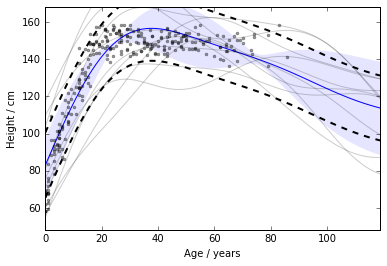

In [4]:
import dp4gp_datasets
import dp4gp
import random
import numpy as np
import GPy
import matplotlib.pyplot as plt
import dp4gp_histogram
import pandas as pd
%matplotlib inline

kung = dp4gp_datasets.load_kung()

X = kung[kung[:,3]==0,2:3]
y = kung[kung[:,3]==0,0:1]
sens = 100.0
epsilon = 50.0
delta = 0.01


middley = (np.max(y)+np.min(y))/2
y[y>middley+sens/2] = middley+sens/2
y[y<middley-sens/2] = middley-sens/2

#ysub = np.mean(y)
ysub = (max(y)+min(y))/2.0
y = y - ysub

ys_std = np.std(y)
y = y / ys_std
ac_sens = sens/ys_std

kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
model = GPy.models.SparseGPRegression(X,y,kernel=kern,num_inducing=4)
model.inference_method = GPy.inference.latent_function_inference.FITC()
#model.set_Z(np.array([[-10,25,60,95]]).T)
#model.set_Z(np.array([[-15,25,65,105]]).T)
model.set_Z(np.array([[-25,25,75]]).T)
model.Gaussian_noise = 0.3

dpgp = dp4gp.DPGP_pseudo_prior(model,ac_sens,epsilon,delta)

plt.figure(figsize=[6,4])
dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:120},ys_mean=ysub,ys_std=ys_std)
plt.ylim([middley-sens*0.6,middley+sens*0.6])

plt.ylabel('Height / cm')
plt.xlabel('Age / years')
plt.savefig('kung_pseudo.pdf')